# Data Visualization & Processing

In [2]:
import numpy as np

## Loading Data

In [3]:
X = [] # Features per class
y = [] # Labels
N = 5250 # Amount of data we want to use max: 5250

# Import the features
with open("traindata.txt", "r") as file:
    for line in file.readlines()[:N]:
        features = [float(i) for i in line.split(",")]
        X.append(features)

# Import the labels
with open("trainlabels.txt", "r") as file:
    for line in file.readlines()[:N]:
        label = float(line.rstrip())
        y.append(label)
    
# Convert data to numpy arrays
X = np.array(X)
y = np.array(y, dtype=np.int32)

## Data Preprocessing

In [45]:
from sklearn.preprocessing import MinMaxScaler
from scipy.ndimage import rotate

In [57]:
minmaxscaler = MinMaxScaler()

image_number = 400
x = X[image_number, :-1]
orientation = X[image_number, -1] # 4 orientations: 0, 1, 2, 3
label = y[image_number]
print(orientation, label)

print(x[0])

filtered_x = x[x >= 0] # Filter out negative values
filtered_x = np.minimum(filtered_x, 255.0) # cap values greater than 255 to 255
image = filtered_x.reshape([32, 32]) / 255.0 # reshape to an image
normalized_image = minmaxscaler.fit_transform(image)

rotation_mapping = {0: 0, 1: 270, 2: 180, 3: 90}
rotated_image = rotate(normalized_image, rotation_mapping[orientation], reshape=True, mode="constant")

0.0 6
1.2444443702697754


## Visualize Image

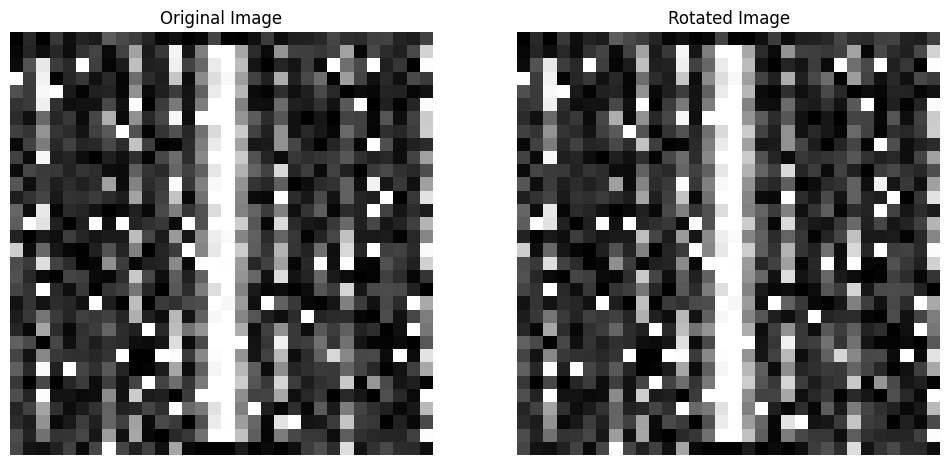

In [58]:
import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(normalized_image, cmap="gray")
axes[0].set_title('Original Image')
axes[0].axis('off')  # Hide the axis

# Display the rotated image
axes[1].imshow(rotated_image, cmap="gray")
axes[1].set_title('Rotated Image')
axes[1].axis('off')  # Hide the axis

# Show the figure
plt.show()